## Exercise 1

In [15]:
import datetime as dt
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt

This program calculates the percentage price change over 2019 of the following shares:

In [2]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

In [5]:
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)

In [10]:
(ticker.INTC.max()/ticker.INTC.min()-1)*100

38.24206879129919

In [19]:
change = (ticker.max()/ticker.min()-1)*100
change = change.sort_values()

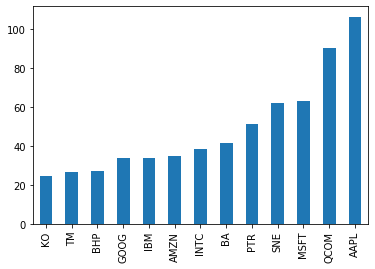

In [20]:
change.plot(kind='bar')

In [29]:
name = pd.DataFrame.from_dict(ticker_list,orient='index')

In [35]:
name.iloc[:,0]

INTC         Intel
MSFT     Microsoft
IBM            IBM
BHP            BHP
TM          Toyota
AAPL         Apple
AMZN        Amazon
BA          Boeing
QCOM      Qualcomm
KO       Coca-Cola
GOOG        Google
SNE           Sony
PTR     PetroChina
Name: 0, dtype: object

In [41]:
ticker.columns = name.iloc[:,0]

In [46]:
ticker.describe()

,Intel,Microsoft,IBM,BHP,Toyota,Apple,Amazon,Boeing,Qualcomm,Coca-Cola,Google,Sony,PetroChina
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,51.375198,130.382024,136.990358,52.134405,128.519921,208.255952,1789.189206,365.027658,71.737302,50.828294,1188.393057,53.773929,56.314643
std,4.380720,14.900505,6.168318,3.064801,8.233496,34.538978,101.313650,24.404630,12.385442,3.270630,81.765383,6.753894,6.805392
min,43.459999,97.400002,112.910004,46.369999,114.650002,142.190002,1500.280029,310.899994,49.400002,44.689999,1016.059998,42.029999,45.279999
25%,47.607501,119.340000,134.114998,49.742500,121.932501,186.019997,1735.845032,348.912491,57.485000,47.669999,1121.527466,48.282499,50.312501
50%,51.075001,135.220001,137.029999,51.879999,126.525002,203.014999,1786.450012,362.925003,74.970001,51.655001,1185.010010,53.695000,54.805000
75%,54.542499,139.177498,140.570007,54.464999,135.942501,223.684998,1855.319946,375.725006,80.795002,53.869999,1240.017548,59.072501,63.677499
max,60.080002,158.960007,151.360001,58.970001,145.059998,293.649994,2020.989990,440.619995,94.029999,55.770000,1361.170044,68.250000,68.599998


In [55]:
change = (ticker.max()-ticker.min())/ticker.min()*100
change = change.sort_values()

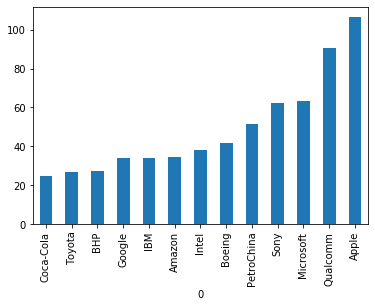

In [56]:
change.plot(kind='bar')

In [53]:
p1 = ticker.iloc[0]
p2 = ticker.iloc[-1]
price_change = (p2-p1)/p1 *100
price_change

0
Intel         27.124036
Microsoft     55.953316
IBM           16.344062
BHP           14.312575
Toyota        20.863429
Apple         85.948580
Amazon        20.057432
Boeing         0.602209
Qualcomm      53.710803
Coca-Cola     17.941611
Google        27.840517
Sony          39.573067
PetroChina   -17.369887
dtype: float64